<a href="https://colab.research.google.com/github/MacounVladimir/UIN/blob/main/Pritomnost_lidi_v_mistnosti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/MacounVladimir/UIN/main/peopleinroom.txt', sep=',')

In [20]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
vstupni_atributy = ['Temperature',	'Humidity', 'Light', 'CO2', 
                    'HumidityRatio']
vystupni_atribut = 'Occupancy'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data[vstupni_atributy], data[vystupni_atribut], test_size=0.2, random_state=8)
print(len(X_train))
print(len(X_test))

7801
1951


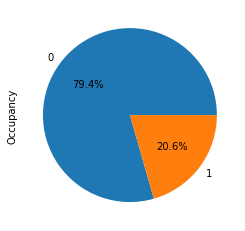

In [24]:
y_train.value_counts().plot.pie(autopct="%1.1f%%")

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("std", StandardScaler()),
    #("lr", LogisticRegression())
    ("rf", RandomForestClassifier(n_estimators=1000))
])

model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators=1000))])

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

In [27]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1506\n           1       0.98      0.99      0.99       445\n\n    accuracy                           0.99      1951\n   macro avg       0.99      0.99      0.99      1951\nweighted avg       0.99      0.99      0.99      1951\n'

In [28]:
accuracy_score(y_test, y_pred)

0.9933367503844183